# Visualization and Communication

## Zhentao Shi

R 4.3.1

<img src="graph/Minard.png" width="1000">
<!-- code is tested on SCRP -->

## Graphs

* "One picture is worth ten thousand words".
* Modern graphs: web-based, interactive.

* Academia
* Journalism: Economist, SCMP, ...

## Plot()

* `plot` is a generic command for graphs in `r-base`.
  * For preliminary statistical graphs.

* `matplot` for multiple objects

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "USD/JPY"

[1] "HKD/JPY"

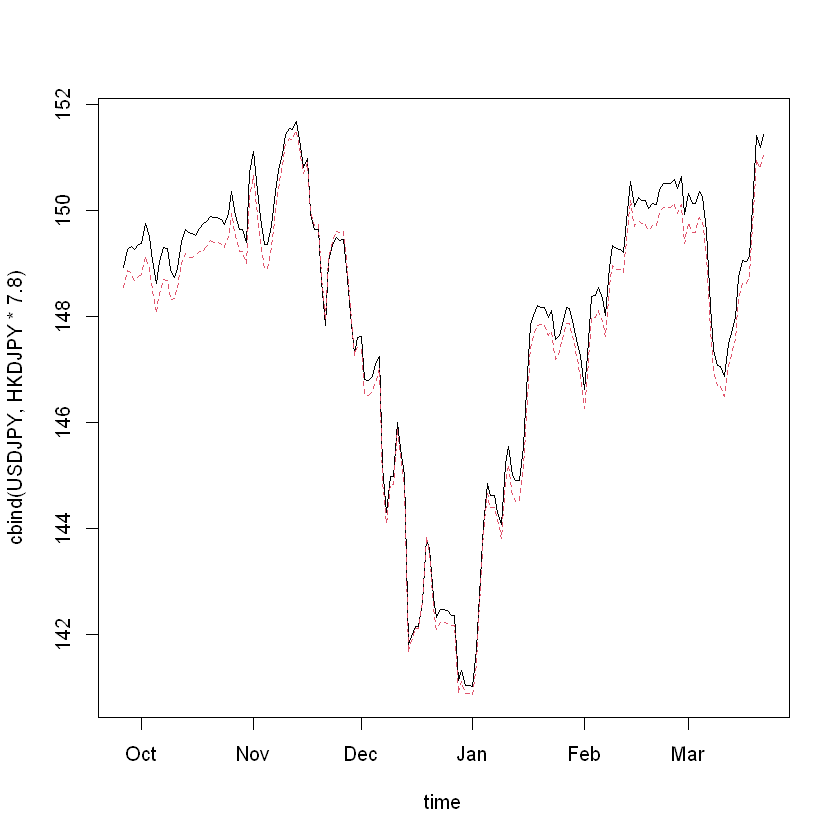

In [1]:
quantmod::getFX("USD/JPY")
quantmod::getFX("HKD/JPY")
matplot( y = cbind(USDJPY, HKDJPY*7.8), 
         x = zoo::index(USDJPY), 
         type = "l", xlab = "time"  )

## ggplot2


* Many proposals to enhance `plot`
* `ggplot2` is the most successful. 

* Advanced system for high-quality statistical graphs.


## Syntax

* `ggplot()` specifies which dataset to use for the graph.
* `geom_XXX()` determines the shape to draw,  
  *  scatter dots
  *  lines
  *  curves or areas...

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


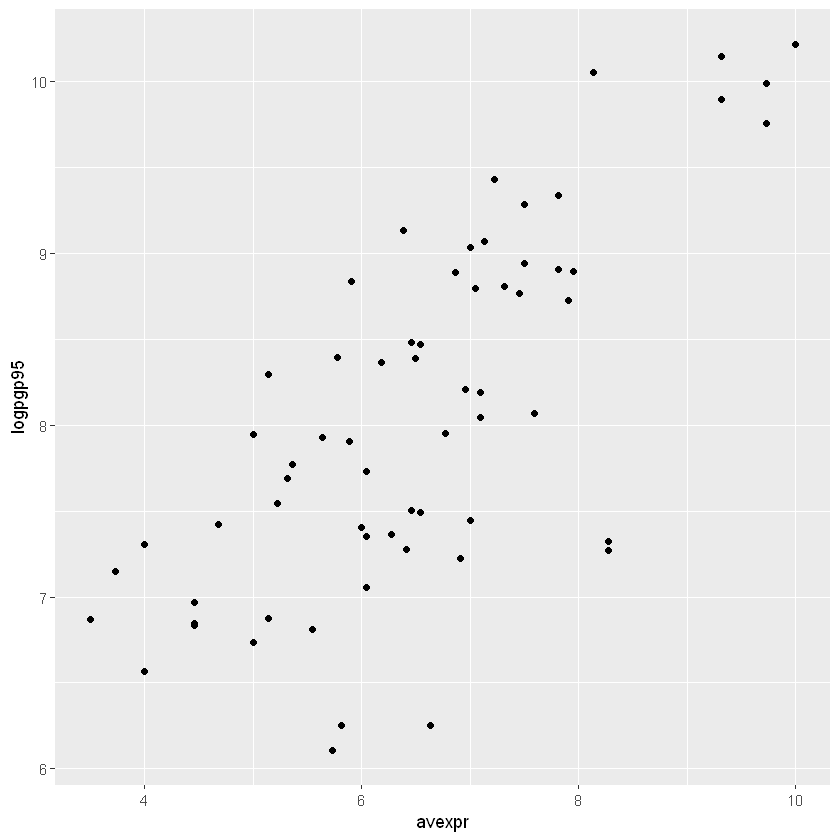

In [2]:
library(tidyverse)
d0 = read.csv("data_example/AJR.csv", header = TRUE)

# "avexpr: average protection against expropriation risk
# "logpgp95": logarithm of GDP per capita in 1995

ggplot(data = d0) + geom_point(mapping = aes(x = avexpr, y = logpgp95))


### Bank Marketing Data


In [3]:
bank_0 = read.csv("data_example/bank-full.csv", header = TRUE, sep = ";" )
dim(bank_0)
names(bank_0)

[1] 45211    17

[1] "age"       "job"       "marital"   "education" "default"   "balance"  
 [7] "housing"   "loan"      "contact"   "day"       "month"     "duration" 
[13] "campaign"  "pdays"     "previous"  "poutcome"  "y"

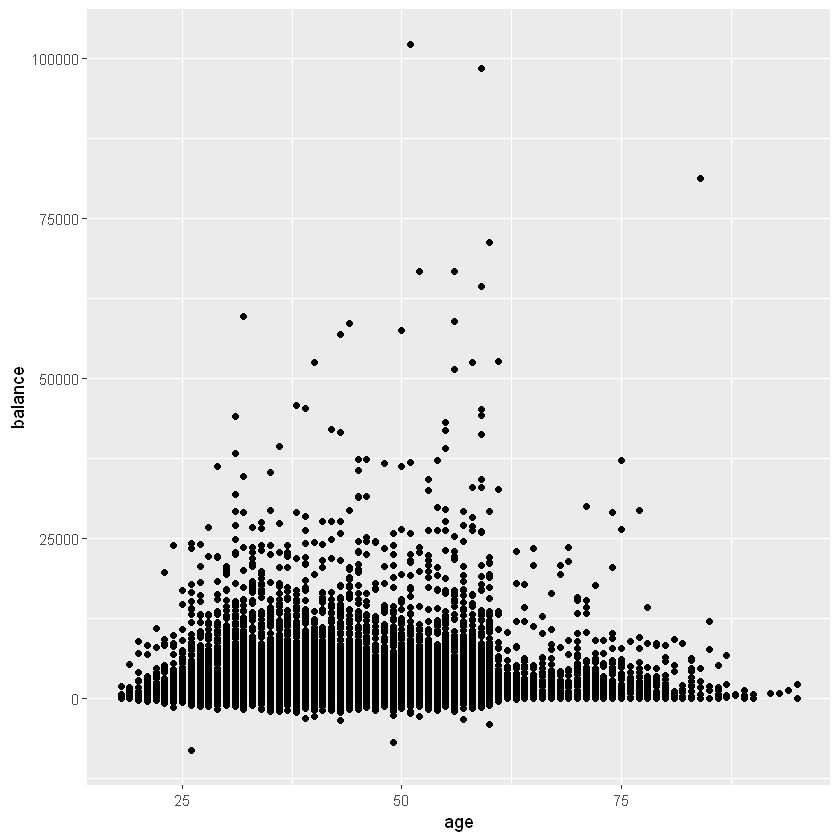

In [4]:
# scatter plot
p1 <- ggplot(data = bank_0) + geom_point(mapping = aes(x = age, y = balance)) 
# balance: average yearly balance, in euros (numeric) 
print(p1)

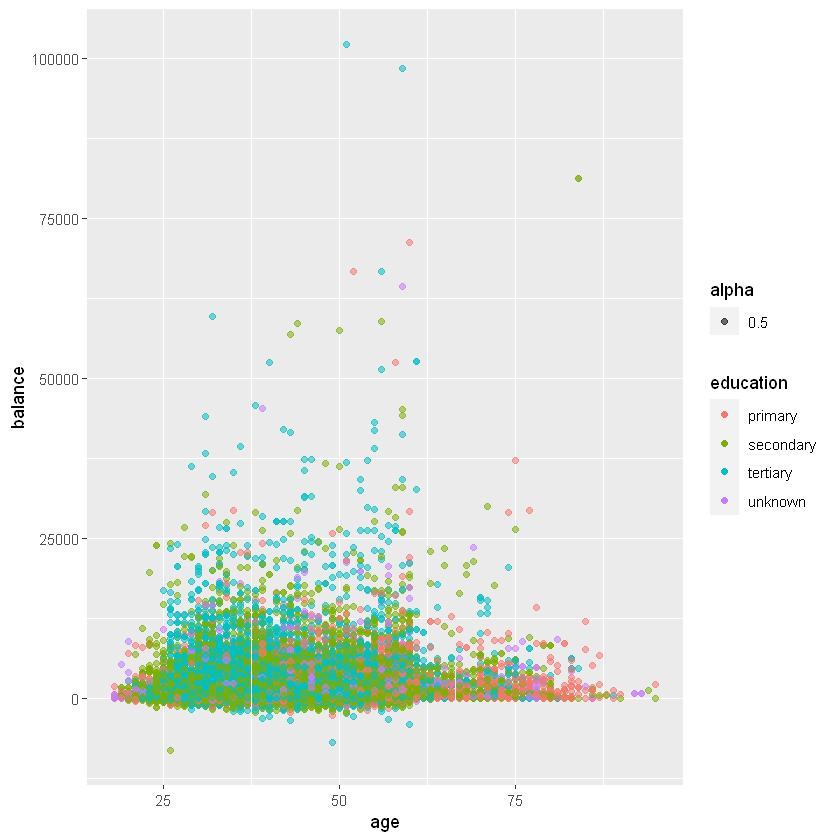

In [5]:
# scatter plot with groups
p2 <- ggplot(data = bank_0) + geom_point(mapping = aes(x = age, y = balance, 
                                                       color = education, 
                                                       alpha = 0.5))
print(p2)

### Subgraphs

* Subgraphs convey rich information and easy comparison.
* `ggplot2` is good at drawing multiple graphs, either of the same pattern or of
different patterns. 


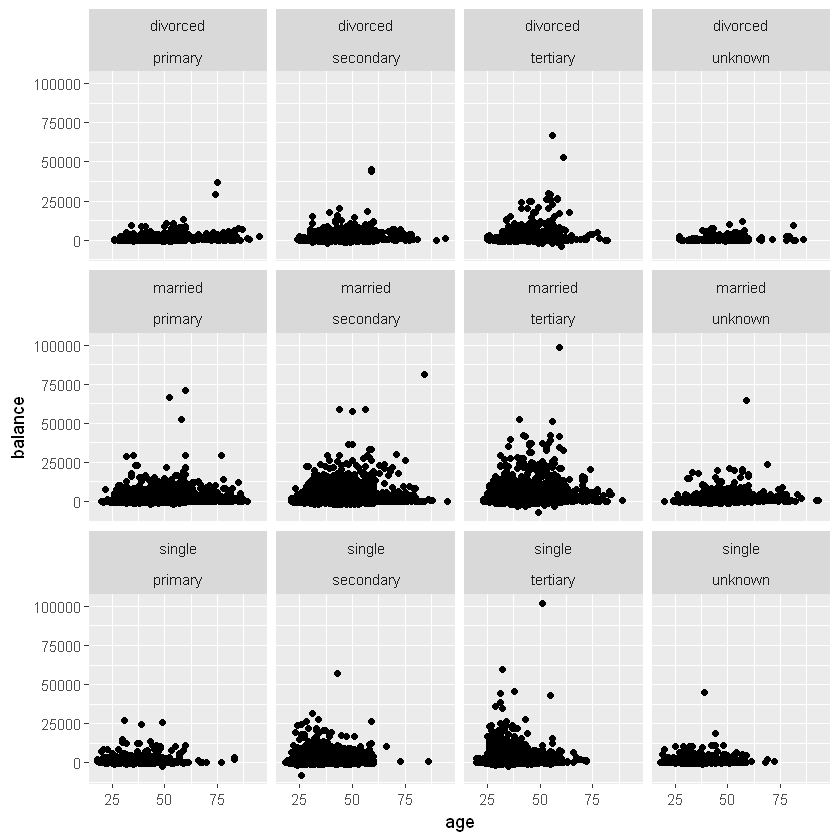

In [6]:
p3 <- p1 + facet_wrap( marital ~ education)
print(p3)

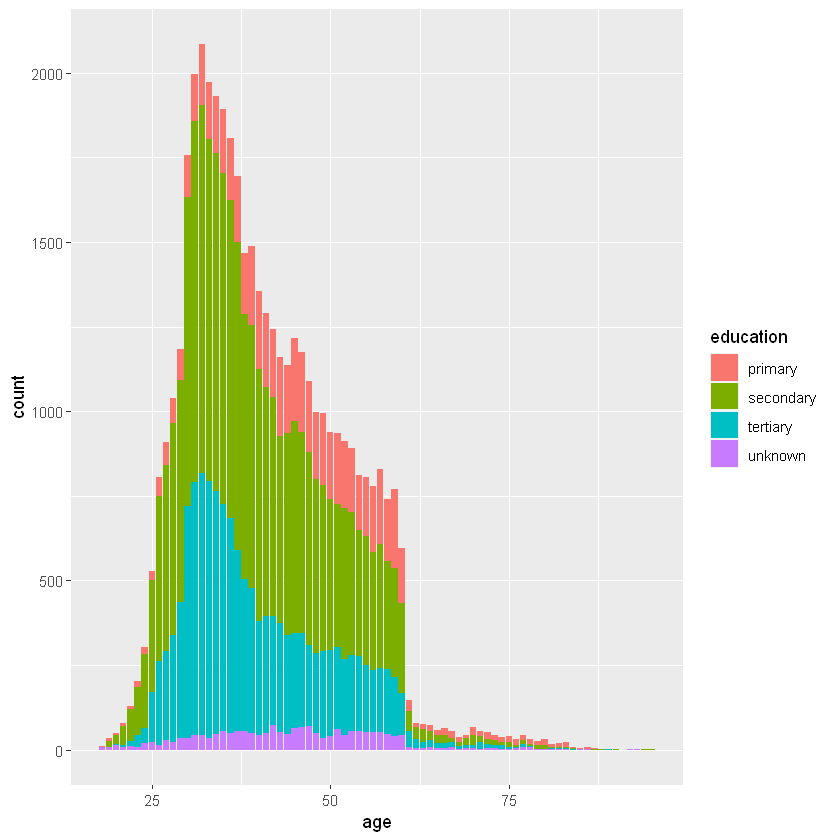

In [7]:
# educational levels in each age
ggplot(data = bank_0) + geom_bar(mapping = aes(x = age, fill = education))

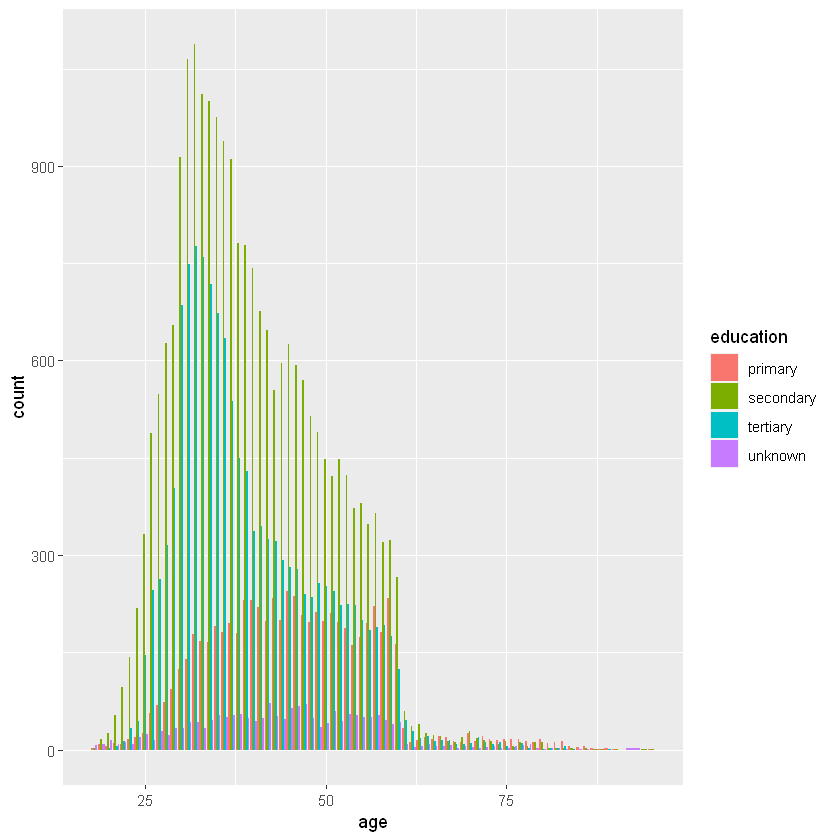

In [8]:
p4 <- ggplot(data = bank_0) + geom_bar(mapping = aes(x = age, fill = education), position = "dodge")
print(p4)

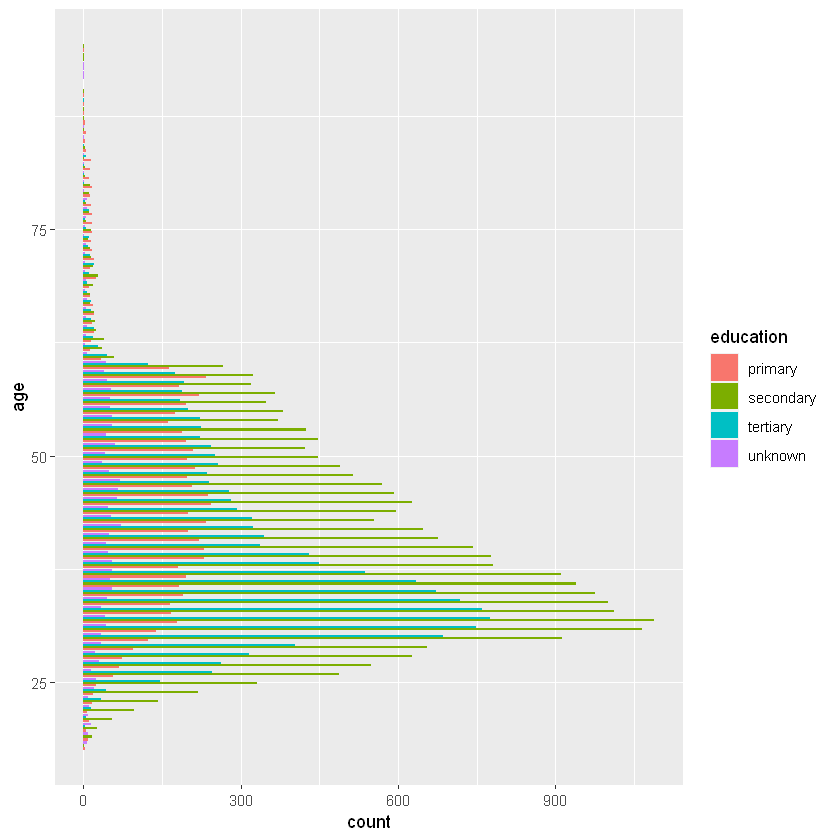

In [9]:
p5 <- p4 + coord_flip()
print(p5) 

## Tidy data

* ggplot adds elements in a graph one by one, and then print out the graph all together.

* `ggplot2` accommodates data frames of a particular format. 
* `tidyr` is a package that helps prepare the data frames.


* Example: [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/?lang=en)

In [10]:
library(tidyverse)
d0 = readr::read_csv("data_example/PWT100.csv", col_names = TRUE)
head(d0)
colnames(d0)

Rows: 12810 Columns: 52
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): countrycode, country, currency_unit, i_cig, i_xm, i_xr, i_outlier,...
dbl (44): year, rgdpe, rgdpo, pop, emp, avh, hc, ccon, cda, cgdpe, cgdpo, cn...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,⋯,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABW,Aruba,Aruban Guilder,1950,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1951,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1952,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1953,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1954,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1955,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "countrycode"   "country"       "currency_unit" "year"         
 [5] "rgdpe"         "rgdpo"         "pop"           "emp"          
 [9] "avh"           "hc"            "ccon"          "cda"          
[13] "cgdpe"         "cgdpo"         "cn"            "ck"           
[17] "ctfp"          "cwtfp"         "rgdpna"        "rconna"       
[21] "rdana"         "rnna"          "rkna"          "rtfpna"       
[25] "rwtfpna"       "labsh"         "irr"           "delta"        
[29] "xr"            "pl_con"        "pl_da"         "pl_gdpo"      
[33] "i_cig"         "i_xm"          "i_xr"          "i_outlier"    
[37] "i_irr"         "cor_exp"       "statcap"       "csh_c"        
[41] "csh_i"         "csh_g"         "csh_x"         "csh_m"        
[45] "csh_r"         "pl_c"          "pl_i"          "pl_g"         
[49] "pl_x"          "pl_m"          "pl_n"          "pl_k"

In [11]:
# work with a smaller dataset

d1 <- select(d0, countrycode, year, rgdpe, pop) %>%
  filter(countrycode %in% c("CHN", "RUS", "JPN", "USA")) %>%
  mutate(gdpcapita = rgdpe/pop) 

# rgdpe: Expenditure-side real GDP at chained PPPs, 
#        to compare relative living standards across countries and over time

print(d1)  

# A tibble: 280 × 5
   countrycode  year   rgdpe   pop gdpcapita
   <chr>       <dbl>   <dbl> <dbl>     <dbl>
 1 CHN          1950     NA    NA        NA 
 2 CHN          1951     NA    NA        NA 
 3 CHN          1952 554906.  580.      957.
 4 CHN          1953 626291.  589.     1063.
 5 CHN          1954 584967.  600.      975.
 6 CHN          1955 642037   612.     1049.
 7 CHN          1956 693936.  625.     1111.
 8 CHN          1957 718619.  639.     1125.
 9 CHN          1958 732356.  652.     1123.
10 CHN          1959 698911.  660.     1059.
# ℹ 270 more rows


Warning message:
"Removed 42 rows containing missing values (`geom_point()`)."


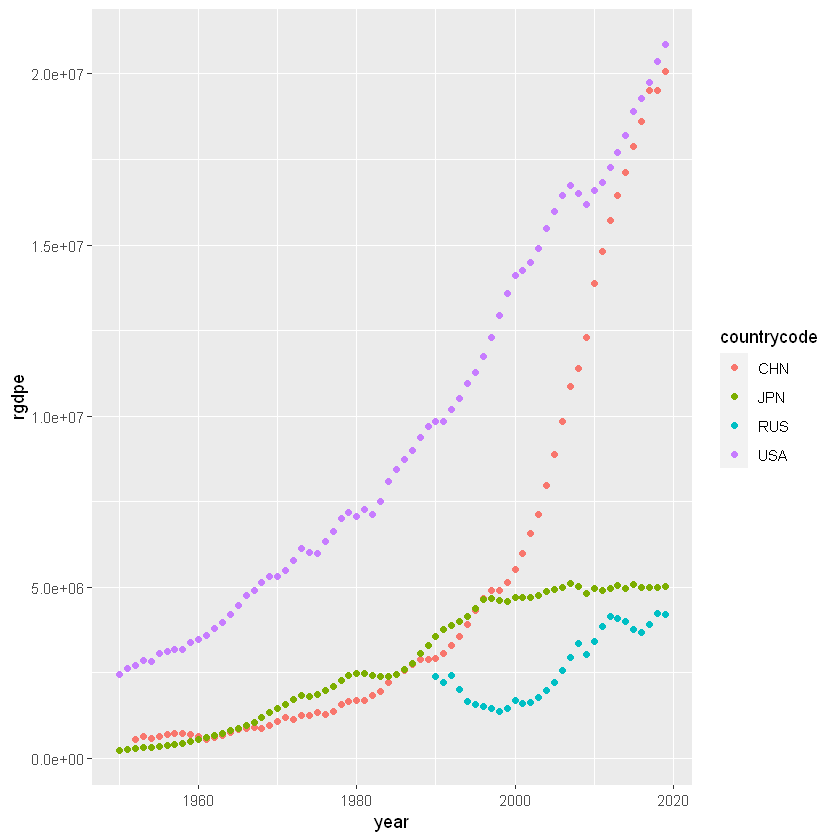

In [12]:
ggplot(d1) + 
  geom_point(mapping = aes(x = year, y = rgdpe, color = countrycode))

Warning message:
"Removed 42 rows containing missing values (`geom_line()`)."


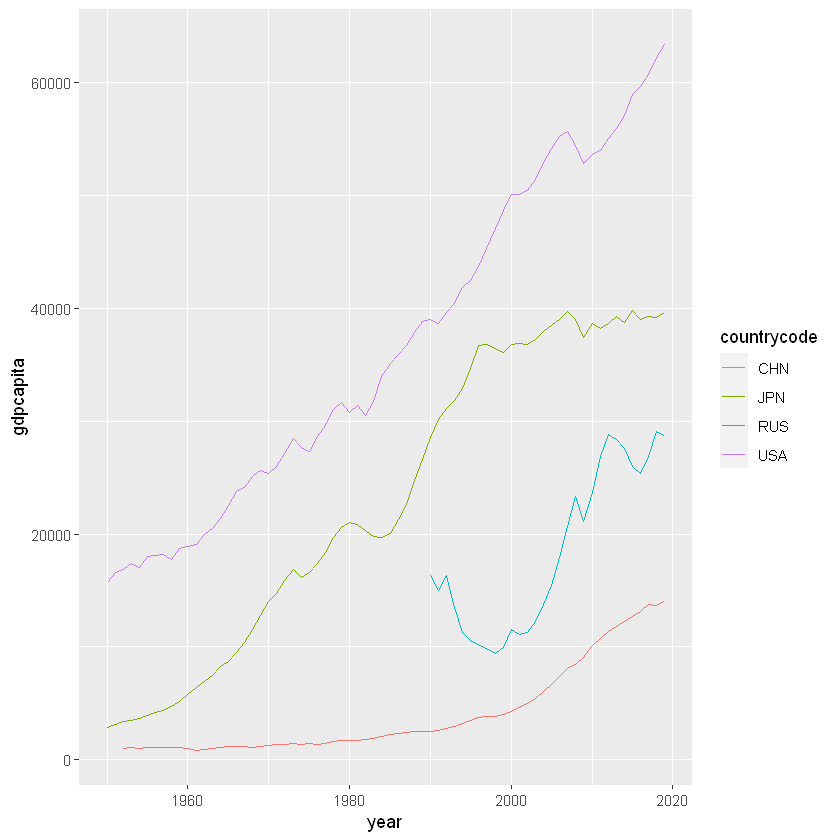

In [13]:
ggplot(d1) + 
  geom_line(mapping = aes(x = year, y = gdpcapita, color = countrycode))

In [14]:
s1 <- d1 %>% 
  select( countrycode, year, pop) %>% # "pop" is population
  spread( key = year, value = pop)
print(s1)


# A tibble: 4 × 71
  countrycode `1950` `1951` `1952` `1953` `1954` `1955` `1956` `1957` `1958`
  <chr>        <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
1 CHN           NA     NA    580.   589.   600.   612.   625.   639.   652. 
2 JPN           84.3   85.6   86.9   88.1   89.3   90.3   91.3   92.1   92.9
3 RUS           NA     NA     NA     NA     NA     NA     NA     NA     NA  
4 USA          156.   158.   161.   164.   167.   170.   173.   176.   179. 
# ℹ 61 more variables: `1959` <dbl>, `1960` <dbl>, `1961` <dbl>, `1962` <dbl>,
#   `1963` <dbl>, `1964` <dbl>, `1965` <dbl>, `1966` <dbl>, `1967` <dbl>,
#   `1968` <dbl>, `1969` <dbl>, `1970` <dbl>, `1971` <dbl>, `1972` <dbl>,
#   `1973` <dbl>, `1974` <dbl>, `1975` <dbl>, `1976` <dbl>, `1977` <dbl>,
#   `1978` <dbl>, `1979` <dbl>, `1980` <dbl>, `1981` <dbl>, `1982` <dbl>,
#   `1983` <dbl>, `1984` <dbl>, `1985` <dbl>, `1986` <dbl>, `1987` <dbl>,
#   `1988` <dbl>, `1989` <dbl>, `1990` <dbl>, `1991` <dbl>, `1992` <db

In [15]:
gather(s1, '1950':'2019', key = "year", value = "pop")

countrycode,year,pop
<chr>,<chr>,<dbl>
CHN,1950,NA
JPN,1950,84.27427
RUS,1950,NA
USA,1950,155.58397
CHN,1951,NA
JPN,1951,85.64072
RUS,1951,NA
USA,1951,158.24770
CHN,1952,579.57718


### Subgraphs of the same pattern


* Example: Plot the density of two estimators under three different data generating processes.



In [16]:
load("data_example/big150.Rdata")
head(big150)

,numb,typb,b1,b2,b1_c,b2_c,sd1,sd2
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12001,150,FE,0.124616242,0.052589980,0.11690387,0.004897183,0.07633832,0.08180969
12002,150,FE,0.267670157,0.018358333,0.25202802,-0.014436204,0.07689387,0.08230519
12003,150,FE,-0.030689329,-0.028174355,-0.03976746,-0.003876498,0.07661975,0.08217404
12004,150,FE,0.121169923,0.063783263,0.11866138,0.018427029,0.07683280,0.08197488
12005,150,FE,0.008300031,0.005754016,-0.02399673,0.013996609,0.07692739,0.08158091
12006,150,FE,-0.026199118,-0.026690088,-0.05231120,0.007498707,0.07668675,0.08175988


In [17]:

big150_1 <- select(big150, typb, b1, b1_c) %>%
            gather("b1", "b1_c", key = "estimator", value = "point")
print(head(big150_1))


  typb estimator        point
1   FE        b1  0.124616242
2   FE        b1  0.267670157
3   FE        b1 -0.030689329
4   FE        b1  0.121169923
5   FE        b1  0.008300031
6   FE        b1 -0.026199118


`theme` is to tune the supplementary elements like the background, the size and font of the axis text and so on.

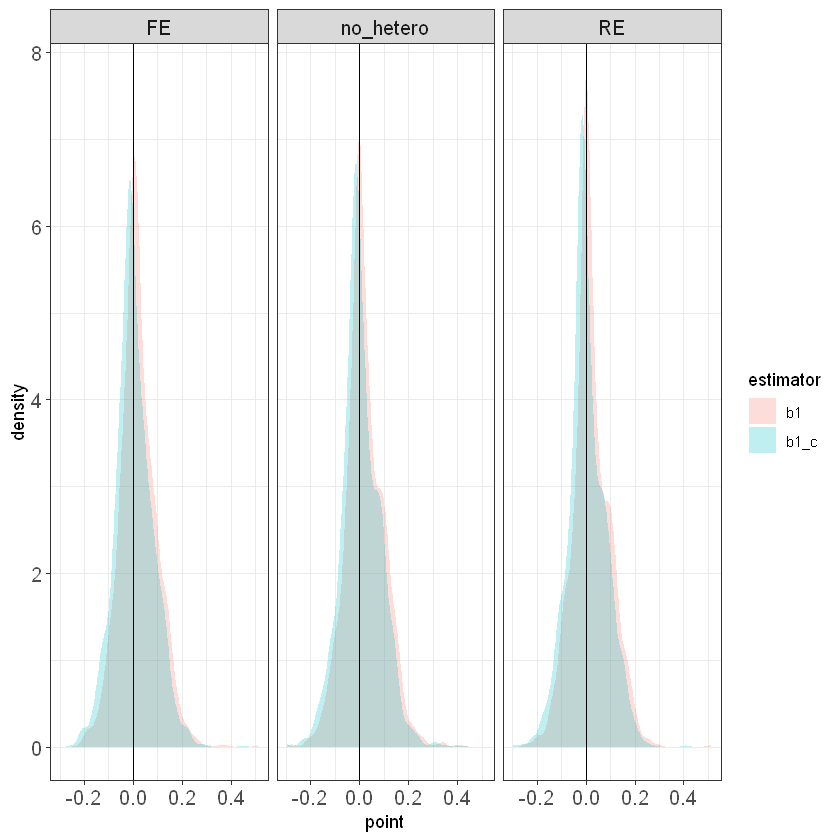

In [18]:

p1 <- ggplot(big150_1)
p1 <- p1 + geom_area(
  stat = "density", alpha = .25,
  aes(x = point, fill = estimator), position = "identity"
)
p1 <- p1 + facet_grid(. ~ typb)
p1 <- p1 + geom_vline(xintercept = 0)
p1 <- p1 + theme_bw()
p1 <- p1 + theme(
  strip.text = element_text(size = 12),
  axis.text = element_text(size = 12)
)
print(p1)

### Example

* This example aligns two graphs of different patterns in one page.
  * Similar graphs appear in [Shi and Zheng, 2018](https://onlinelibrary.wiley.com/doi/abs/10.1002/jae.2640).
  * To unify the theme of the two subgraphs,
define an object `theme1` and apply it in both graphic objects
`p1` and `p2`.



In [19]:
# graph packages
library(lattice)
library(ggplot2)
library(gridExtra)

load("data_example/multigraph.Rdata") # load data

# unify the theme in the two graphs
theme1 <- theme_bw() + theme(
  axis.title.x = element_blank(),
  strip.text = element_text(size = 12),
  axis.text = element_text(size = 12),
  legend.position = "bottom", legend.title = element_blank()
)

Warning message:
"package 'gridExtra' was built under R version 4.3.2"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."


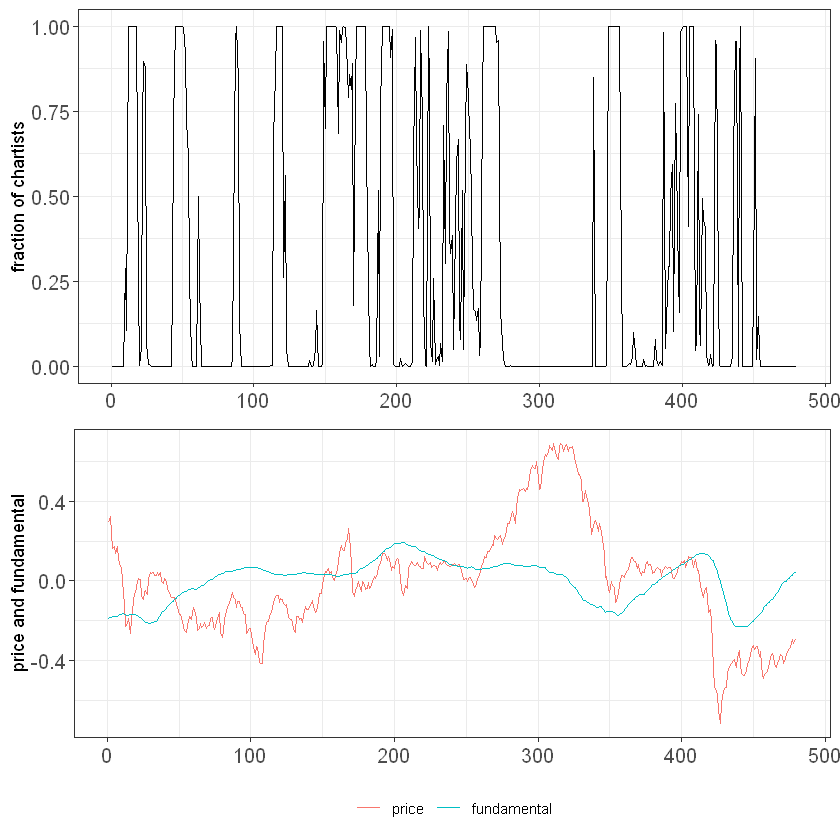

In [20]:
# sub-graph 1
d1 <- data.frame(month = 1:480, m = m_vec)
p1 <- qplot(x = month, y = m, data = d1, geom = "line")
p1 <- p1 + theme1 + ylab("fraction of chartists")

# sug-graph 2
d2$month <- 1:480
p2 <- ggplot(d2) + geom_line(aes(x = month, y = value, col = variable))
p2 <- p2 + theme1 + ylab("price and fundamental")

# generate the grahp
grid.arrange(p1, p2, nrow = 2)

## Interactive Graph

* Users provides customized inputs
* Graph presents corresponding outcome

* `flexboard.Rmd` is an example.
* Easy to convert a ggplot2 graph with `plotly::ggplotly()`.



## Shiny App

Web-based R package for interactive graph. 


* [tutorial](https://shiny.rstudio.com/tutorial/)


* `UI`: interface
* `Server`: calculation of input data


### Example


* [Shenzhen housing price](https://zhentao-shi.shinyapps.io/ShenzhenHousing-Shiny/)
  * [code](https://github.com/metricshilab/Shenzhen-Housing)
* [HP filter](https://zwmei-metrics.shinyapps.io/boosted_hp_app/)
  * [code](https://github.com/metricshilab/Boosted_HP_App)
<!-- 
**Also, see my script of Newton's method.** -->

## Reading

* [Wickham and Grolemund](https://r4ds.hadley.nz/)
  * Ch 1: data visualization
  * Ch.5: tidy data
  
* This [link](https://cosx.org/2023/02/earthquake/) is a good example of using `ggplot2` to draw nice statistical graphs.